In [2]:
import numpy as np
import sys
sys.path.append('/home/zzbenjamin94/Desktop/Astronomy/Research/DES_Galaxy_Cluster')

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from tools.plot_utils import plot_pretty
import pickle
plot_pretty()

# setup notebook for inline figures
%matplotlib inline

from tools.setup.setup import data_home_dir, home_dir, bigdata_home_dir
import astropy.io.fits as fits

datadir = data_home_dir()
homedir = home_dir()
bigdatadir = bigdata_home_dir()

## This part for merging the projection file. 

In [241]:
halos_dir = datadir + 'halo_run/'+'halorun_buzzardunique_matched.fits'
halos_list = fits.open(halos_dir)
halos_data = halos_list[1].data

#Checking FITS into
#hrun_list.info()
print "Names of columns in hrun_data are: \n"
halos_data.names[1] = 'Mvir'
print halos_data.names

#Converting FITS files into record array
halos_data = np.array(halos_data, dtype=halos_data.dtype)
halos_data = halos_data.view(np.recarray)

print "\n Number of halos is", len(halos_data)


Names of columns in hrun_data are: 

['HALOID', 'MVIR', 'MEM_MATCH_ID', 'RA', 'DEC', 'Z', 'P_BCG', 'Z_LAMBDA', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_CHISQ_ZORIG', 'SCALEVAL', 'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'MASKFRAC', 'GEOMASKFRAC', 'R_LAMBDA', 'R_MASK', 'Z_LAMBDA_E', 'NCROSS', 'Z_LAMBDA_NITER', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'PZBINS', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'BCG_SPEC_Z', 'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD', 'ra_cent', 'dec_cent', 'p_cen', 'p_sat', 'ID_CENT', 'M200B', 'RVIR', 'PX', 'PY', 'PZ']

 Number of halos is 144507


In [242]:
#Rotate the PX, PY, PZ. RA, DEC taken from halo run and are already rotated. 
#Rotate the halo files
import healpy as hp
import fitsio
from tools.setup.setup import tools_home_dir
import pickle

toolsdir = tools_home_dir()

#file containing the rotation matrix 
rotfile = toolsdir+'desy3_irot.pkl'

with open(rotfile, 'r') as fp:
    rmat = pickle.load(fp)

halos_posvec = np.array([halos_data['PX'], halos_data['PY'], halos_data['PZ']])
halos_rposvec = np.dot(rmat, halos_posvec)

#Rotate the Cartesian positions.
halos_X = halos_rposvec[0]; halos_Y = halos_rposvec[1]; halos_Z = halos_rposvec[2]

In [243]:
#HOW to write to the FITS file?
#Something to do next and the run the halo_shape program. 
from astropy.io import fits
hdul = fits.open(halos_dir)
hdul[1].data['PX'] = halos_X; hdul[1].data['PY'] = halos_Y; hdul[1].data['PZ'] = halos_Z

#From kpc to Mpc
hdul[1].data['RVIR'] /= 1000
print hdul[1].data['RVIR']

hdul.writeto('halorun_buzzardunique_rotated.fits')

[3.396857 3.028247 2.900238 ... 0.819929 0.791169 0.804954]


## This part for merging hrun and Buzzard by haloID

In [244]:
halos_dir = datadir + 'buzzard_halo/chinchilla/Chinchilla-0_halos_unique_all.fits'
halos_list = fits.open(halos_dir)
halos_data = halos_list[1].data

#Checking FITS into
#hrun_list.info()
print "Names of columns in halos_data are: \n"
print halos_data.names

#Converting FITS files into record array
#halos_data = np.array(halos_data, dtype=halos_data.dtype)
#halos_data = halos_data.view(np.recarray)

print "\n Number of halos is", len(halos_data.ID)

Names of columns in halos_data are: 

['ID', 'DESCID', 'MVIR', 'VMAX', 'VRMS', 'RVIR', 'RS', 'NP', 'PX', 'PY', 'PZ', 'VX', 'VY', 'VZ', 'JX', 'JY', 'JZ', 'SPIN', 'RS_KLYPIN', 'MVIR_ALL', 'M200B', 'M200C', 'M500C', 'M2500C', 'XOFF', 'VOFF', 'SPIN_BULLOCK', 'B_TO_A', 'C_TO_A', 'PID', 'LUMTOT', 'LUM20', 'LBCG', 'NGALS', 'N18', 'N19', 'N20', 'N21', 'N22', 'Z', 'RA', 'DEC']

 Number of halos is 12198813


In [245]:
hrun_dir = datadir + '/halo_run/buzzard-0_1.6_y3_run_halos_lambda_chisq_chto_fullhalo_final_chto.fit'
hrun_list = fits.open(hrun_dir)
hrun_data = hrun_list[1].data

#Checking FITS into
#hrun_list.info()
print "Names of columns in halos_data are: \n"
print hrun_data.names

#Converting FITS files into record array
#hrun_data = np.array(hrun_data, dtype=hrun_data.dtype)
#hrun_data = hrun_data.view(np.recarray)

print "\n Number of halos is", len(hrun_data)

Names of columns in halos_data are: 

['HALOID', 'Mvir', 'R200', 'MEM_MATCH_ID', 'RA', 'DEC', 'Z', 'P_BCG', 'Z_LAMBDA', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_CHISQ_ZORIG', 'SCALEVAL', 'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'MASKFRAC', 'GEOMASKFRAC', 'R_LAMBDA', 'R_MASK', 'Z_LAMBDA_E', 'NCROSS', 'Z_LAMBDA_NITER', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'PZBINS', 'PZ', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'BCG_SPEC_Z', 'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD', 'ra_cent', 'dec_cent', 'p_cen', 'p_sat', 'ID_CENT', 'M200B']

 Number of halos is 144508


#### Cuts and filters

In [9]:
#Cut off halos with mass less than 5*10^13 M_sun
mass_cutoff = halos_data['M200B'] > 5e13
halos_data = halos_data[mass_cutoff]
print "After mass cut of M > 5e13 M_sun number of halos is ", len(halos_data)

After mass cut of M > 5e13 M_sun number of halos is  540434


In [11]:
#Find all HALOID matches.
#Append the lensed RA, DEC to the FITS data file of the original. We need the original for X, Y, Z rotation. 
#Makes things much easier. 

print "Before halocut but after mass cut number of halos in halos_data is ", len(halos_data)
halos_matched_bool = np.isin(halos_data['ID'], hrun_data['HALOID'])
halocut = np.where(halos_matched_bool == True)[0]
halos_data = halos_data[halocut]
print "After halocut number of halos in halos_data is ", len(halos_data)

#Halo_Run catalog has repeating halos. Clean that up
print "Before unique cut number of halos in hrun is ", len(hrun_data)
unique_ID, unique_ind = np.unique(hrun_data['HALOID'], return_index=True)
hrun_data = hrun_data[unique_ind]
print "After unique cut number of halos in hrun is ", len(hrun_data)

print "Before halocut but after mass cut number of halos in hrun_data is ", len(hrun_data)
halos_matched_bool = np.isin(hrun_data['HALOID'], halos_data['ID'])
halocut = np.where(halos_matched_bool == True)[0]
hrun_data = hrun_data[halocut]
print "After halocut number of halos in hrun_data is ", len(hrun_data)

#Check that all IDs are one-to-one matched
ID_matched_bool = np.isin(halos_data['ID'], hrun_data['HALOID'])
ID_matched_num = len(ID_matched_bool)
print "After halocut ", ID_matched_num, " out of ", len(halos_data), "halos in halos_data are in hrun_data"
ID_matched_bool = np.isin(hrun_data['HALOID'], halos_data['ID'])
ID_matched_num = len(ID_matched_bool)
print "After halocut ", ID_matched_num, " out of ", len(hrun_data), "halos in hrun_data are in halos_data"

Before halocut but after mass cut number of halos in halos_data is  540434
After halocut number of halos in halos_data is  144507
Before unique cut number of halos in hrun is  144508
After unique cut number of halos in hrun is  144508
Before halocut but after mass cut number of halos in hrun_data is  144508
After halocut number of halos in hrun_data is  144507
After halocut  144507  out of  144507 halos in halos_data are in hrun_data
After halocut  144507  out of  144507 halos in hrun_data are in halos_data


In [12]:
#Sort the arrays by order of ID. That way the indices match. 
#For hrun
ID_sort = np.argsort(hrun_data['HALOID'])
hrun_data = hrun_data[ID_sort]
print "After sorting, IDs in hrun are: "
print hrun_data['HALOID'], "\n"

#For redM_halos
ID_sort = np.argsort(halos_data['ID'])
halos_data = halos_data[ID_sort]
print "After sorting, IDs in redM_halos are: "
print halos_data['ID'], "\n"

print np.where(np.isin(halos_data['ID'], hrun_data['HALOID']) == False)
print np.where(np.isin(hrun_data['HALOID'], halos_data['ID'], ) == False)

After sorting, IDs in hrun are: 
[    760306    2166226    2166663 ... 1010781934 1010782194 1010782295] 

After sorting, IDs in redM_halos are: 
[    760306    2166226    2166663 ... 1010781934 1010782194 1010782295] 

(array([], dtype=int64),)
(array([], dtype=int64),)


### Matching full halo catalog to hrun catalog

Appending the halorun lensed RA, DEC parameters onto the sim halo catalog.

Creates a new FITS file. 

The number of rows is before filter. This is problematic. 

In [ ]:
orig_cols = halos_data.columns
new_cols = fits.ColDefs([ \
    fits.Column(name='RA_obs', format='D', array=hrun_data.RA), \
    fits.Column(name='DEC_obs', format='D', array=hrun_data.DEC), \
    fits.Column(name='LAMBDA_CHISQ_hrun', format='D', array=hrun_data.LAMBDA_CHISQ)])
        
#hdu = fits.BinTableHDU.from_columns(orig_cols + new_cols)
#print orig_cols
#hdu.writeto('Chinchilla-0_unique_all_mergehrun.fits')

# Merging truth BCG with Chinchilla-0

## Importing files

In [3]:
BCG_filename = datadir + 'buzzard_halo/truth_galaxy/'+'BCG_info.data'    
BCG_file = open(BCG_filename, "rb" )
BCG_data = pickle.load(BCG_file)


IOError: [Errno 2] No such file or directory: '/home/zzbenjamin94/Desktop/Astronomy/Research/DES_Galaxy_Cluster/data//buzzard_halo/truth_galaxy/BCG_info.data'

## Matching by coordinates

# Merging shape, clusters and halos. 
Ignore the shapes for v1.4 of cluster-halo. Particle info from v1.6 is deleted.

## Import catalogs

In [35]:
##Import BCG file
BCG_dir = datadir + 'v1.6/BCG_v1.6_data.fits'
BCG_list = fits.open(BCG_dir)
BCG_data = BCG_list[1].data
print BCG_data.dtype
print len(BCG_data)

(numpy.record, [('ID', '>i8'), ('HALOID', '>i8'), ('RA', '>f8'), ('TRA', '>f8'), ('DEC', '>f8'), ('TDEC', '>f8'), ('Z', '>f8')])
11161403


In [36]:
#Miscentering cut
import pickle

#Loading the centered/miscentered halo IDs
matched_redM = homedir + 'output/buzzard/redM_matched_v1.4_redMv1.6.dat'
matched_halos = homedir + 'output/buzzard/halos_matched_v1.4_redMv1.6.dat'

infile = open(matched_redM,'rb')
matched_redM = pickle.load(infile)

infile = open(matched_halos,'rb')
redM_halos = pickle.load(infile)

redM_halos = redM_halos.view(np.recarray)
matched_redM = matched_redM.view(np.recarray)

print redM_halos.dtype
print matched_redM.dtype


(numpy.record, [('RA', '>f8'), ('TRA', '>f8'), ('DEC', '>f8'), ('TDEC', '>f8'), ('Z', '>f8'), ('HALOID', '>i8'), ('DESCID', '>i8'), ('MVIR', '>f8'), ('VMAX', '>f8'), ('VRMS', '>f8'), ('RVIR', '>f8'), ('RS', '>f8'), ('NP', '>f8'), ('PX', '>f8'), ('PY', '>f8'), ('PZ', '>f8'), ('VX', '>f8'), ('VY', '>f8'), ('VZ', '>f8'), ('JX', '>f8'), ('JY', '>f8'), ('JZ', '>f8'), ('SPIN', '>f8'), ('RS_KLYPIN', '>f8'), ('MVIR_ALL', '>f8'), ('M200B', '>f8'), ('M200C', '>f8'), ('M500C', '>f8'), ('M2500C', '>f8'), ('XOFF', '>f8'), ('VOFF', '>f8'), ('SPIN_BULLOCK', '>f8'), ('B_TO_A', '>f8'), ('C_TO_A', '>f8'), ('PID', '>i8'), ('LUMTOT', '>f8'), ('LUM20', '>f8'), ('LBCG', '>f8'), ('NGALS', '>i8'), ('N18', '>i8'), ('N19', '>i8'), ('N20', '>i8'), ('N21', '>i8'), ('N22', '>i8'), ('matching_ID', '<i8')])
(numpy.record, [('MEM_MATCH_ID', '>i4'), ('RA', '>f8'), ('DEC', '>f8'), ('MODEL_MAG', '>f4', (4,)), ('MODEL_MAGERR', '>f4', (4,)), ('REFMAG', '>f4'), ('REFMAG_ERR', '>f4'), ('ZRED', '>f4'), ('ZRED_E', '>f4'), ('Z

## Match and divide shape file into centered/miscentered

### Apply cuts

In [37]:
#Apply cuts
#mass cut
mcut = np.where(redM_halos.M200B >= 1e13)
redM_halos = redM_halos[mcut]
matched_redM = matched_redM[mcut]
print "After mass cut matched halos has num ", len(redM_halos)

#Redshift cut
zcut = np.where(redM_halos.Z <= 0.90)
redM_halos = redM_halos[zcut]
matched_redM = matched_redM[zcut]
print "After z cut matched halos has num ", len(redM_halos)

'''
#Converge cut
convcut = np.where(redM_shape.converge == True)
redM_shape = redM_shape[convcut]
print "After convcut redM-shape has num ", len(redM_shape)

#Shape has repeating halos. 
unique_ID, unique_ind = np.unique(redM_shape.halos_ID, return_index=True)
redM_shape = redM_shape[unique_ind]
'''


After mass cut matched halos has num  23658
After z cut matched halos has num  23658


'\n#Converge cut\nconvcut = np.where(redM_shape.converge == True)\nredM_shape = redM_shape[convcut]\nprint "After convcut redM-shape has num ", len(redM_shape)\n\n#Shape has repeating halos. \nunique_ID, unique_ind = np.unique(redM_shape.halos_ID, return_index=True)\nredM_shape = redM_shape[unique_ind]\n'

### Find intersection of halo/cluster and shape

In [41]:
#Match BCG to haloID
haloid_bool = np.isin(BCG_data.HALOID, redM_halos.HALOID)
haloid_ind = np.where(haloid_bool == True)[0]
BCG_data = BCG_data[haloid_ind]

[ 16116697   2240565  15080442 ... 118818676 118877712 125182034]
[110385189 124235235 117984266 ... 128971535 118272367 128975390]
[    0     1     2 ... 23655 23656 23657]


In [43]:
## Sort BCG to match redM_halos
sort_idx = BCG_data.HALOID.argsort()
sort_idx = sort_idx[np.searchsorted(BCG_data.HALOID, redM_halos.HALOID, sorter = sort_idx)]
BCG_data = BCG_data[sort_idx]
print BCG_data.HALOID
print redM_halos.HALOID
print redM_halos.matching_ID

#How to sort BCG_ID by haloID

[110385189 124235235 117984266 ... 128971535 118272367 128975390]
[110385189 124235235 117984266 ... 128971535 118272367 128975390]
[    0     1     2 ... 23655 23656 23657]


In [46]:
## Sort by matching ID
sort_idx = matched_redM.matching_ID.argsort()
sort_idx = sort_idx[np.searchsorted(matched_redM.matching_ID, redM_halos.matching_ID, sorter = sort_idx)]
matched_redM = matched_redM[sort_idx]

print matched_redM.matching_ID
print redM_halos.matching_ID

[    0     1     2 ... 23655 23656 23657]
[    0     1     2 ... 23655 23656 23657]


## Extract Shape Parameters

## Combine into a single record array

In [47]:
def add_field(a, descr):
    """Return a new array that is like "a", but has additional fields.

    Arguments:
      a     -- a structured numpy array
      descr -- a numpy type description of the new fields

    The contents of "a" are copied over to the appropriate fields in
    the new array, whereas the new fields are uninitialized.  The
    arguments are not modified.

    >>> sa = numpy.array([(1, 'Foo'), (2, 'Bar')], \
                         dtype=[('id', int), ('name', 'S3')])
    >>> sa.dtype.descr == numpy.dtype([('id', int), ('name', 'S3')])
    True
    >>> sb = add_field(sa, [('score', float)])
    >>> sb.dtype.descr == numpy.dtype([('id', int), ('name', 'S3'), \
                                       ('score', float)])
    True
    >>> numpy.all(sa['id'] == sb['id'])
    True
    >>> numpy.all(sa['name'] == sb['name'])
    True
    """
    dt = a.dtype.descr
    dt.extend(descr)
    
    if a.dtype.fields is None:
        raise ValueError, "`A' must be a structured numpy array"
    b = np.empty(a.shape, dtype=dt)
    for name in a.dtype.names:
        b[name] = a[name]
    return b

In [49]:
new_fields = np.dtype([('MEM_MATCH_ID', int), ('LAMBDA_CHISQ', float), ('RA_REDM', float), ('DEC_REDM', float), 
                       ('centered_flag', int), ('ID_CENT', int), ('BCG_ID',int)]).descr\
             #('q', float), ('s', float), ('cosi', float), ]).descr

redM_halos = add_field(redM_halos, new_fields)

In [50]:
redM_halos = redM_halos.view(np.recarray)

redM_halos.MEM_MATCH_ID = matched_redM.MEM_MATCH_ID
redM_halos.LAMBDA_CHISQ = matched_redM.LAMBDA_CHISQ
redM_halos.RA_REDM = matched_redM.RA; redM_halos.DEC_REDM = matched_redM.DEC
redM_halos.centered_flag = matched_redM.centered_flag
redM_halos.ID_CENT = matched_redM.ID_CENT[:,0]
redM_halos.BCG_ID = BCG_data.ID
#redM_halos.q = q
#redM_halos.s = s
#redM_halos.cosi = cos_i

print redM_halos.dtype
print len(redM_halos)

(numpy.record, [('RA', '>f8'), ('TRA', '>f8'), ('DEC', '>f8'), ('TDEC', '>f8'), ('Z', '>f8'), ('HALOID', '>i8'), ('DESCID', '>i8'), ('MVIR', '>f8'), ('VMAX', '>f8'), ('VRMS', '>f8'), ('RVIR', '>f8'), ('RS', '>f8'), ('NP', '>f8'), ('PX', '>f8'), ('PY', '>f8'), ('PZ', '>f8'), ('VX', '>f8'), ('VY', '>f8'), ('VZ', '>f8'), ('JX', '>f8'), ('JY', '>f8'), ('JZ', '>f8'), ('SPIN', '>f8'), ('RS_KLYPIN', '>f8'), ('MVIR_ALL', '>f8'), ('M200B', '>f8'), ('M200C', '>f8'), ('M500C', '>f8'), ('M2500C', '>f8'), ('XOFF', '>f8'), ('VOFF', '>f8'), ('SPIN_BULLOCK', '>f8'), ('B_TO_A', '>f8'), ('C_TO_A', '>f8'), ('PID', '>i8'), ('LUMTOT', '>f8'), ('LUM20', '>f8'), ('LBCG', '>f8'), ('NGALS', '>i8'), ('N18', '>i8'), ('N19', '>i8'), ('N20', '>i8'), ('N21', '>i8'), ('N22', '>i8'), ('matching_ID', '<i8'), ('MEM_MATCH_ID', '<i8'), ('LAMBDA_CHISQ', '<f8'), ('RA_REDM', '<f8'), ('DEC_REDM', '<f8'), ('centered_flag', '<i8'), ('ID_CENT', '<i8'), ('BCG_ID', '<i8')])
23658


In [51]:
print redM_halos.BCG_ID
print redM_halos.ID_CENT

[ 90002853535 376001981071 381002415978 ...  38003541492 110004207654
  41003249860]
[ 90002140438 376002466800 381003157622 ...  38002542337 110003856442
  41004414006]


In [52]:
#Save onto a pickle file
import pickle
filehandler = open("redM_halos_noshape_v1.4_redMv1.6.data","wb")
pickle.dump(redM_halos, filehandler)
filehandler.close()

## Merging BCG ID with Parent Halo ID.

BCGs are found from truth_data.CENTRAL == 1
Parent halos are found from truth_data.PID == -1

More parent halos than BCGs. This is good.
Parent halo cut removes a fraction of BCGs. Should this happen?

In [18]:
BCG_filename = datadir + 'v1.9.2/BCG_info_v1.9.2_Chinchilla-4.data'    
BCG_file = open(BCG_filename, "rb" )
BCG_data = pickle.load(BCG_file)

#Import IDs that aren't subhalos.
hosthalo_filename = datadir + 'v1.9.2/hosthalo_v1.9.2_Chinchilla-4.data'  
hosthalo_file = open(hosthalo_filename, 'rb')
hosthalo_ID = pickle.load(hosthalo_file)

In [19]:
print "Before matching:"
print len(BCG_data), len(hosthalo_ID)

Before matching:
6647993 12769538


In [21]:
#Uniqueness for halos
unique_ID, unique_ind = np.unique(hosthalo_ID, return_index=True)
hosthalo_ID = hosthalo_ID[unique_ind]

#Uniqueness for BCGs
unique_ID, unique_ind = np.unique(BCG_data['HALOID'], return_index=True)
BCG_data = BCG_data[unique_ind]

#Cut the BCGs 
halos_matched_bool = np.isin(BCG_data['HALOID'], hosthalo_ID)
halocut = np.where(halos_matched_bool == True)[0]
BCG_data = BCG_data[halocut]

#Cut the halos
BCG_matched_bool = np.isin(hosthalo_ID, BCG_data['HALOID'])
BCG_cut = np.where(BCG_matched_bool == True)[0]
hosthalo_ID = hosthalo_ID[BCG_cut]

In [22]:
print "After matching: "
print len(BCG_data), len(hosthalo_ID)

After matching: 
3109744 3109744


In [23]:
##Output to a pickle file
import pickle
BCG_file = 'BCG_hosthalo_matched_v1.9.2_Chinchilla-4.data'
outfile = open(BCG_file, 'wb')
pickle.dump(BCG_data, outfile)
outfile.close()

## Create a record array of halos with TRA, TDEC info from BCGs. 

Note on the catalog:

Chinchilla-4 v1.9.2 halos only have TRA, TDEC. 

Chinchilla-4 v1.9.2 BCGs only have lensed RA, DEC. 

Need to patch the BCG coordinates onto the halo coordinates for matching to redM. 

### Import halo & BCG file. 

In [2]:
halos_dir = bigdatadir + 'Buzzard_Sims/v1.9.2/Chinchilla-4/halos/Chinchilla-4_halos.all.fits'
halos_list = fits.open(halos_dir)
halos_data = halos_list[1].data

#Checking FITS into
#hrun_list.info()
print "Names of columns in halos_data are: \n"
print halos_data.names

#Converting FITS files into record array
halos_data = np.array(halos_data, dtype=halos_data.dtype)
halos_data = halos_data.view(np.recarray)

print "\n Number of halos is", len(halos_data.ID)

Names of columns in halos_data are: 

['A[Z]', 'A[Y]', 'RA', 'C[Y]', 'VMAX', 'C_TO_A', 'Z', 'Z_COS', 'JX', 'B[Z]', 'TRA', 'VZ', 'B[X]', 'VY', 'HOST_HALOID', 'M200C', 'B[Y]', 'VX', 'JZ', 'A[X]', 'VRMS', 'M200B', 'M500C', 'TDEC', 'RS', 'C[Z]', 'ID', 'SPIN', 'VOFF', 'NP', 'PY', 'RVIR', 'M2500C', 'DEC', 'MVIR', 'C[X]', 'PZ', 'JY', 'XOFF', 'PX', 'B_TO_A']

 Number of halos is 13368118


In [3]:
## Open BCG file after matching if not done yet. 
BCG_filename = datadir + 'v1.9.2/BCG_hosthalo_matched_v1.9.2_Chinchilla-4.data'    
BCG_file = open(BCG_filename, "rb" )
BCG_data = pickle.load(BCG_file)
BCG_data = BCG_data.view(np.recarray)
print "Number of BCG after matching to hosthalos. Should match number of halos. "
print len(BCG_data)
print BCG_data.dtype

Number of BCG after matching to hosthalos. Should match number of halos. 
3109744
(numpy.record, [('ID', '<i8'), ('HALOID', '<i8'), ('RA', '<f4'), ('TRA', '<f4'), ('DEC', '<f4'), ('TDEC', '<f4'), ('Z', '<f4')])


### Reduce and re-shuffle the BCG file to match halo file

In [4]:
#Cut the halos
BCG_matched_bool = np.isin(halos_data.ID, BCG_data['HALOID'])
BCG_cut = np.where(BCG_matched_bool == True)[0]
halos_data = halos_data[BCG_cut]

#Uniqueness for halos
unique_ID, unique_ind = np.unique(halos_data.ID, return_index=True)
halos_data = halos_data[unique_ind]

print "Number of halos after matching to BCG and cutting non-host halos. Should match number of BCGs."
print len(halos_data)

Number of halos after matching to BCG and cutting non-host halos. Should match number of BCGs.
3109744


In [31]:
#Sorting 
##! This step not strictly necessary as the matching already does it, but just in case. 
sort_idx = halos_data.ID.argsort()
sort_idx = sort_idx[np.searchsorted(halos_data.ID, BCG_data['HALOID'], sorter = sort_idx)]
halos_data = halos_data[sort_idx]

### Testing and plotting

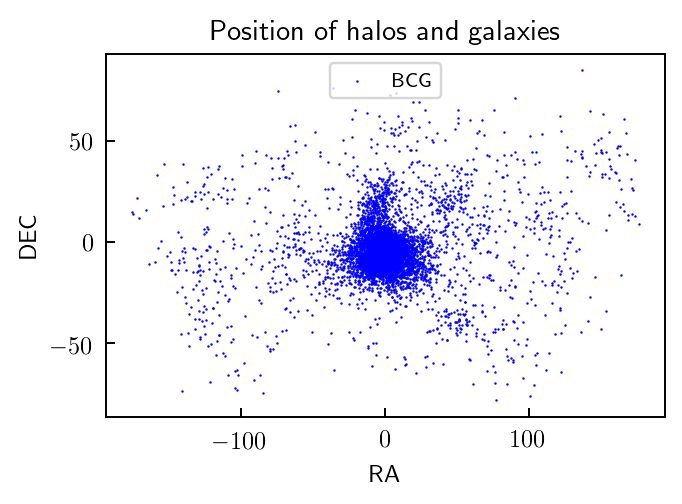

In [36]:
#Scatter plot to inspect that halos match clusters
plt.figure(figsize=(4,3))
#plt.scatter(halos_data.TRA[::100], halos_data.TDEC[::100], c='r', s=7, marker='o',linewidth=0.0, label='halo')
#plt.scatter(BCG_data.RA[::100], BCG_data.DEC[::100], c='b', s=7, marker='o',linewidth=0.0, label='BCG')
#RA_diff = halos_data.TRA - BCG_data.RA; DEC_diff = halos_data.TDEC - BCG_data.TDEC
plt.scatter(RA_diff[::500], DEC_diff[::500], c='b', s=1, marker='o',linewidth=0.0, label='BCG')

plt.xlabel('RA'); plt.ylabel('DEC ')
plt.legend(fontsize=8, loc='upper center')
plt.title('Position of halos and galaxies')
plt.tight_layout()
#plt.savefig('halo_cluster_pos.png')
plt.show()

### Add BCG coordintes onto halo and store record array as pickle file 

In [7]:
#Add BCG RA, DEC onto the halos RA, DEC
halos_data.RA = BCG_data.RA; halos_data.DEC = BCG_data.DEC

In [8]:
filehandler = open("halos_BCG_hosthalo_cut_v1.9.2_Chinchilla_4.data","wb")
pickle.dump(halos_data, filehandler)
filehandler.close()